# Correlación

## Definición

Para nuestro objetivo, la correlación cruzada (o a veces denominada "covarianza cruzada") es una medida de la similitud entre dos señales, frecuentemente usada para encontrar características relevantes en una señal desconocida por medio de la comparación con otra que sí se conoce.

El operador correlación entre dos señales discretas está definido como:

$$Corr(n)=\sum_{m=0}^{M-1}{f(m)g(m-n)}$$

<img src="correlacion.gif" alt="Correlacion">

## Ejemplo

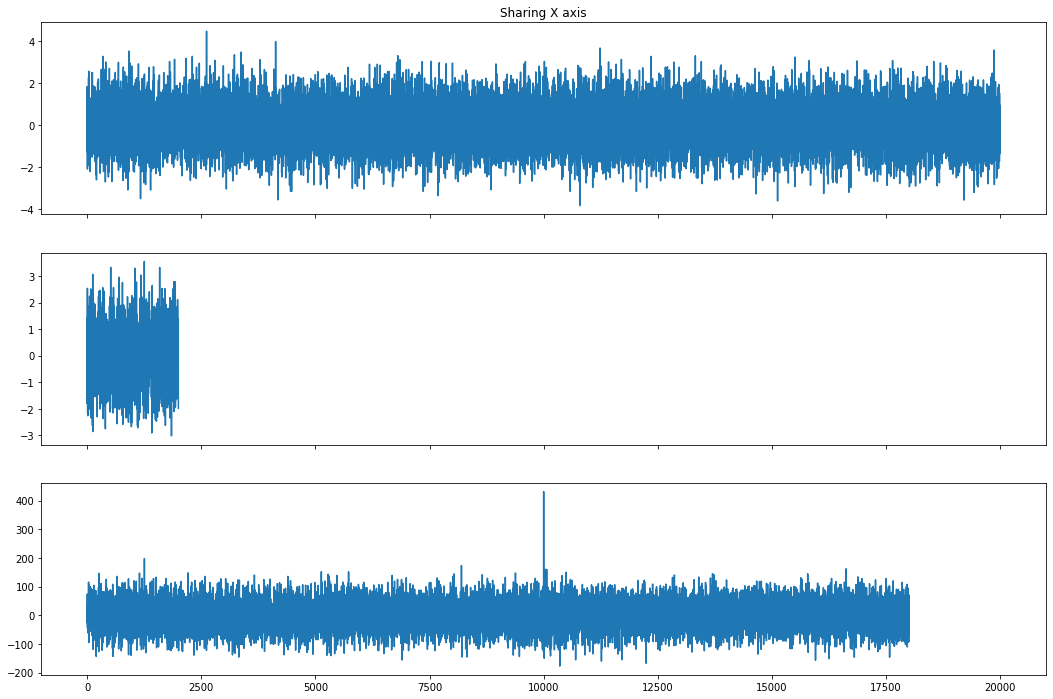

El máximo de la correlación está en:
10000


In [7]:
import numpy as np
from matplotlib import pyplot as plt
#Defino la señal desconocida:
x=np.random.randn(20000)
#Extraigo una parte de la señal desconocida, representará la señal conocida
y=np.random.randn(2000)
x[10000:12000]+=0.2*y
corr=np.correlate(x,y)
f, axarr = plt.subplots(3, sharex=True,figsize=(18,12))
axarr[0].plot(x)
axarr[0].set_title('Sharing X axis')
axarr[1].plot(y)
axarr[2].plot(corr)
plt.show()
print("El máximo de la correlación está en:")
print(corr.argmax())

En el caso anterior, como es ruido blanco no correlacionado, el mismo tiende a cero si está mal sincronizado y tiende a la varianza de la señal multiplicada por N si está perfectamente sincronizado.

## Ejemplo 2

Para el caso de una señal senoidal la búsqueda de sincronismo es un poco mas complicada, ya que la correlación de una senoidal, con una senoidal ligeramente desplazada sigue teniendo un valor muy alto.

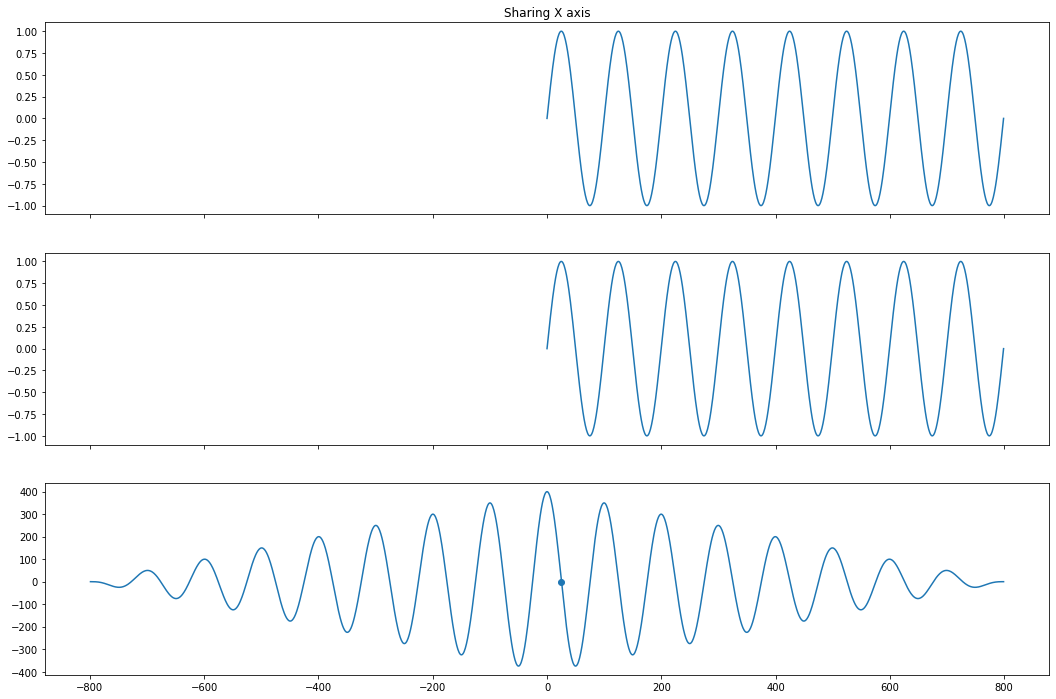

In [23]:
x1=np.sin(np.linspace(0,16*np.pi,800))
x2=np.sin(np.linspace(0,16*np.pi,800))
corr=np.correlate(x1,x2,mode='full')
f, axarr = plt.subplots(3,sharex=True, figsize=(18,12))
axarr[0].plot(x1)
axarr[0].set_title('Sharing X axis')
axarr[1].plot(x2)
axarr[2].plot(range(-799,800),corr)
axarr[2].scatter([25],[0])
plt.show()

Cuando están perfectamente sincronizadas (t=0), la correlación es máxima. A diferencia del caso anterior, cuando el sincronismo no es perfecto, la correlación sigue teniendo un valor alto. Cuando el defasaje entre las señales es 90 grados (25 muestras).

# Búsqueda de una senoidal sumergida en ruido

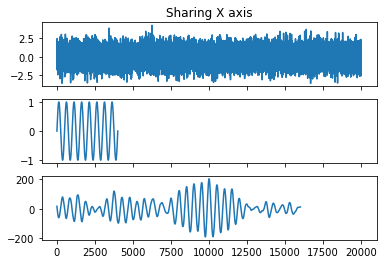

El máximo de la correlación está en:
9994


In [383]:
alfa=0.1

#Defino la señal desconocida:
x=np.random.randn(20000)

#Extraigo una parte de la señal desconocida, representará la señal conocida
y=np.sin(np.linspace(0,16*np.pi,4000))
x[10000:14000]+=alfa*y
corr=np.correlate(x,y)
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(x)
axarr[0].set_title('Sharing X axis')
axarr[1].plot(y)
axarr[2].plot(corr)
plt.show()

print("El máximo de la correlación está en:")
print(corr.argmax())

* ¿Qué pasa con la dispersión de la estimación cuando achico o agrando $\alpha$ ?
* ¿Qué pasa con la dispersión de la estimación cuando achico o agrando el tamaño de la señal conocida?

# Detectar una senoidal sumergida en otra senoidal

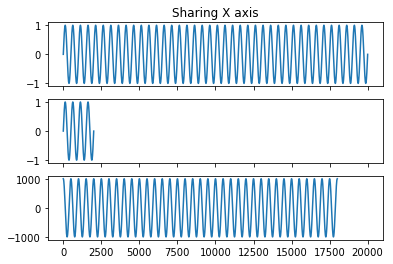

In [65]:
import numpy as np
from matplotlib import pyplot as plt
#Defino la proporción de mezcla entre la señal conocida y la señal desconocida
alfa=0.2

#Defino la señal desconocida:
x=np.sin(np.linspace(0,80*np.pi,20000))

#Analizo la correlación con la misma señal
y=np.sin(np.linspace(0,8*np.pi,2000))

corr=np.correlate(x,y)
f, axarr = plt.subplots(3, sharex=True)
axarr[0].plot(x)
axarr[0].set_title('Sharing X axis')
axarr[1].plot(y)
axarr[2].plot(corr)
plt.show()